In [98]:
import glob
import json
import os.path as path
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D


In [6]:
abl_fp = "experiments/ablation/"

In [12]:
val_accs = {300: {}, 600: {}, 1200: {}}
for exp_fp in glob.glob(path.join(abl_fp, "*")):
    with open(path.join(exp_fp, "opts.json")) as f:
        opts = json.load(f)
    tile_size = opts["tile_size"]
    assert len(opts["data_modalities"]) == 1
    mod = opts["data_modalities"][0]
    with open(path.join(exp_fp, "logs.json")) as f:
        logs = json.load(f)
    val_accs[tile_size][mod] = []
    for entry in logs:
        val_accs[tile_size][mod].append(entry["va_acc"])

In [140]:
cmap = matplotlib.cm.get_cmap('Set1')

formatting = {
    "admin_bounds_qgis": {"name": "Admin bounds", "color": cmap(0.1)},
    "population": {"name": "Population", "color": cmap(0.2)},
    "elevation": {"name": "Elevation", "color": cmap(0.3)},
    "osm_img": {"name": "OSM image", "color": cmap(0.4)},
    "slope": {"name": "Slope", "color": cmap(0.5)},
    "roads": {"name": "Roads", "color": cmap(0.8)},
    "waterways": {"name": "Waterways", "color": cmap(0.7)}
}
mods = sorted(val_accs[tile_size])
mods_name = [formatting[m]["name"] for m in sorted(val_accs[tile_size])]
custom_lines = [
    Line2D([0], [0], color=formatting[m]["color"], lw=3, marker='o', markersize=5) 
    for m in mods]

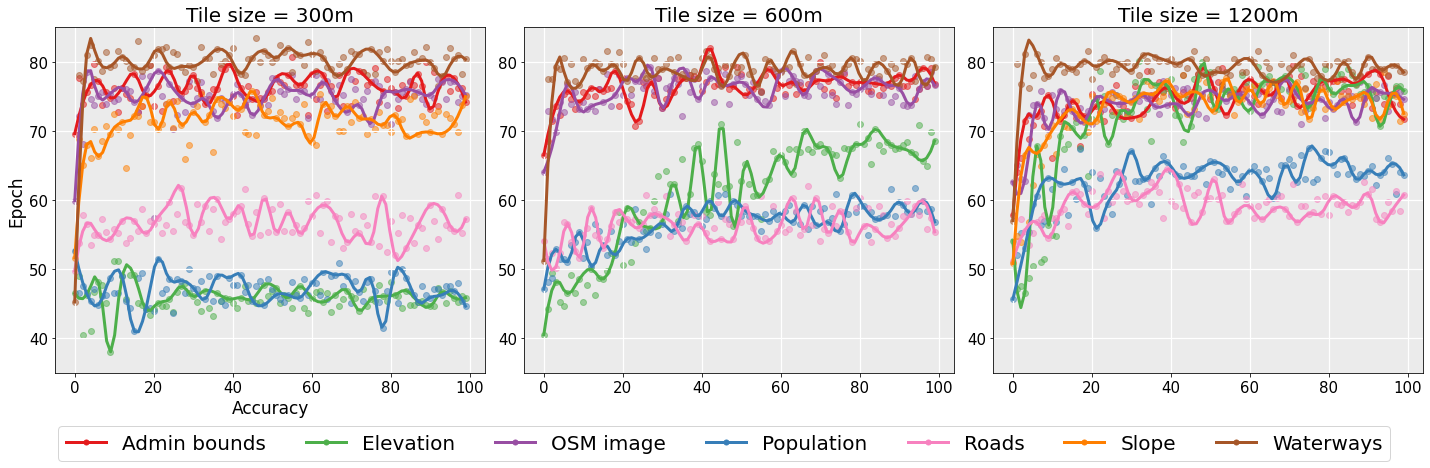

In [162]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, tile_size in enumerate([300, 600, 1200]):
    for name in sorted(val_accs[tile_size]):
        accs = val_accs[tile_size][name]
        # _ = axes[i].plot(accs, label=formatting[name]["name"], color=formatting[name]["color"])
        
        # smoothed line
        xnew = np.linspace(0, 100, 100) 

        spl = make_interp_spline(list(range(100))[::3], accs[::3], k=2)  # type: BSpline
        power_smooth = spl(xnew)

        axes[i].plot(xnew[:-1], power_smooth[:-1], 
                     label=formatting[name]["name"], color=formatting[name]["color"], lw=3)
        axes[i].scatter(range(100), accs, color=formatting[name]["color"], alpha=0.5)
        _ = axes[i].set_ylim([35, 85])
        axes[i].set_facecolor('#EBEBEB')
        axes[i].grid(which='major', color='white', linewidth=1.2)
        axes[i].grid(which='minor', color='white', linewidth=0.6)
        axes[i].tick_params(axis='both', which='major', labelsize=15)
        if i == 0:
            axes[i].set_ylabel("Epoch", fontsize=17)
            axes[i].set_xlabel("Accuracy", fontsize=17)
        axes[i].set_title("Tile size = {}m".format(tile_size), fontsize=20)
            
        # _ = axes[i].legend()
_ = fig.legend(
    custom_lines,
    mods_name,
    loc='lower right', 
    bbox_to_anchor=(0.975, -0.1), 
    ncol=7, 
    bbox_transform=fig.transFigure,
    fontsize=20)
plt.tight_layout()
plt.savefig("ablation_mods.pdf", dpi=300, bbox_inches="tight")

In [ ]:
# 300 represents number of points to make between T.min and T.max

plt.show()

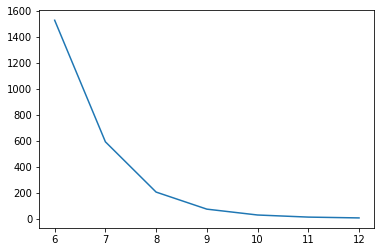

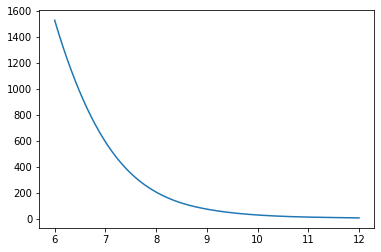

In [58]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

T = np.array([6, 7, 8, 9, 10, 11, 12])
power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])

plt.plot(T,power)
plt.show()

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(T.min(), T.max(), 300) 

spl = make_interp_spline(T, power, k=3)  # type: BSpline
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)
plt.show()

In [107]:
xnew

array([ 6.        ,  6.02006689,  6.04013378,  6.06020067,  6.08026756,
        6.10033445,  6.12040134,  6.14046823,  6.16053512,  6.18060201,
        6.2006689 ,  6.22073579,  6.24080268,  6.26086957,  6.28093645,
        6.30100334,  6.32107023,  6.34113712,  6.36120401,  6.3812709 ,
        6.40133779,  6.42140468,  6.44147157,  6.46153846,  6.48160535,
        6.50167224,  6.52173913,  6.54180602,  6.56187291,  6.5819398 ,
        6.60200669,  6.62207358,  6.64214047,  6.66220736,  6.68227425,
        6.70234114,  6.72240803,  6.74247492,  6.76254181,  6.7826087 ,
        6.80267559,  6.82274247,  6.84280936,  6.86287625,  6.88294314,
        6.90301003,  6.92307692,  6.94314381,  6.9632107 ,  6.98327759,
        7.00334448,  7.02341137,  7.04347826,  7.06354515,  7.08361204,
        7.10367893,  7.12374582,  7.14381271,  7.1638796 ,  7.18394649,
        7.20401338,  7.22408027,  7.24414716,  7.26421405,  7.28428094,
        7.30434783,  7.32441472,  7.34448161,  7.36454849,  7.38